In [1]:
from src.vrp.utils.getData import GetData
from src.vrp.algorithm.population import Population
from src.vrp.algorithm.genetic import Genetic
from src.vrp.utils.utils import *

import random
import numpy as np

random.seed(42)
np.random.seed(42)

## C·∫•u h√¨nh tham s·ªë

In [2]:
DEPOT = "University of Transport and Communications"
NUM_POINTS = 30
MAX_DISTANCE = 10
NUM_VEHICLES = 5

# GA parameters
POPULATION_SIZE = 500
MAX_GENERATIONS = 1000
MUTATION_RATE = 0.01
ELITISM_SIZE = 5

## Hi·ªÉn th·ªã d·ªØ li·ªáu tr√™n Map

In [3]:
data_generator = GetData(
        location_name=DEPOT, 
        num_random_points=NUM_POINTS,  
        max_distance_km=MAX_DISTANCE
)

locations, distance_matrix = data_generator.run()

In [4]:
map_center = create_map_with_markers(locations, DEPOT)
map_center

## Ma tr·∫≠n kho·∫£ng c√°ch gi·ªØa c√°c ƒëi·ªÉm

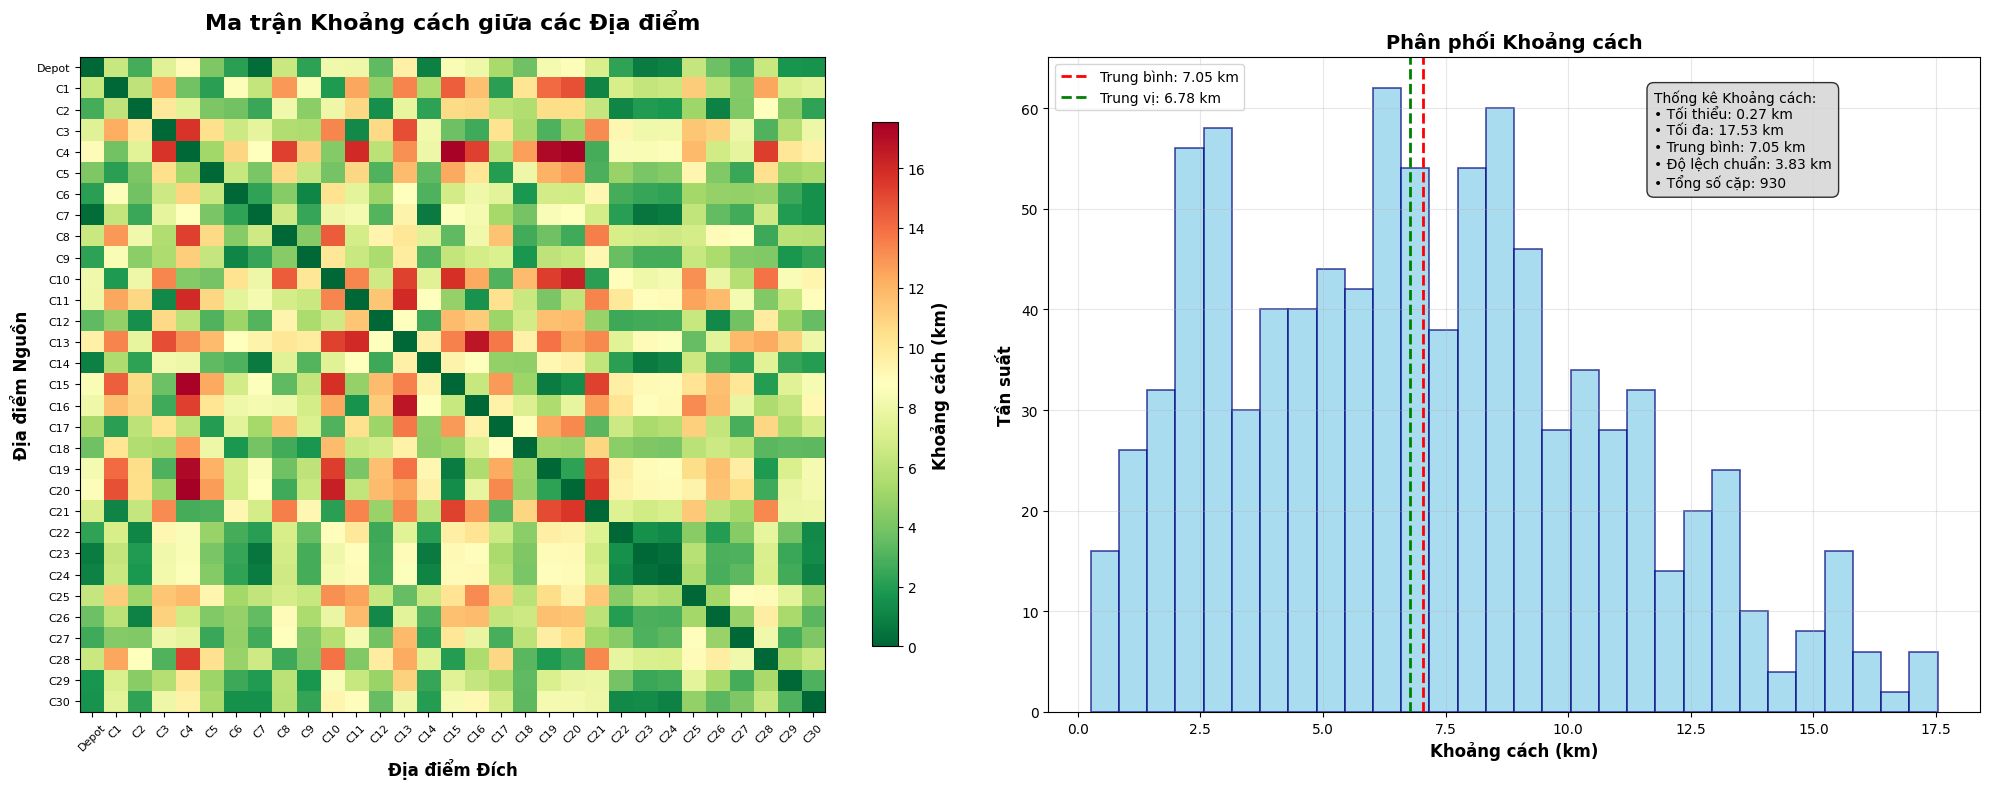

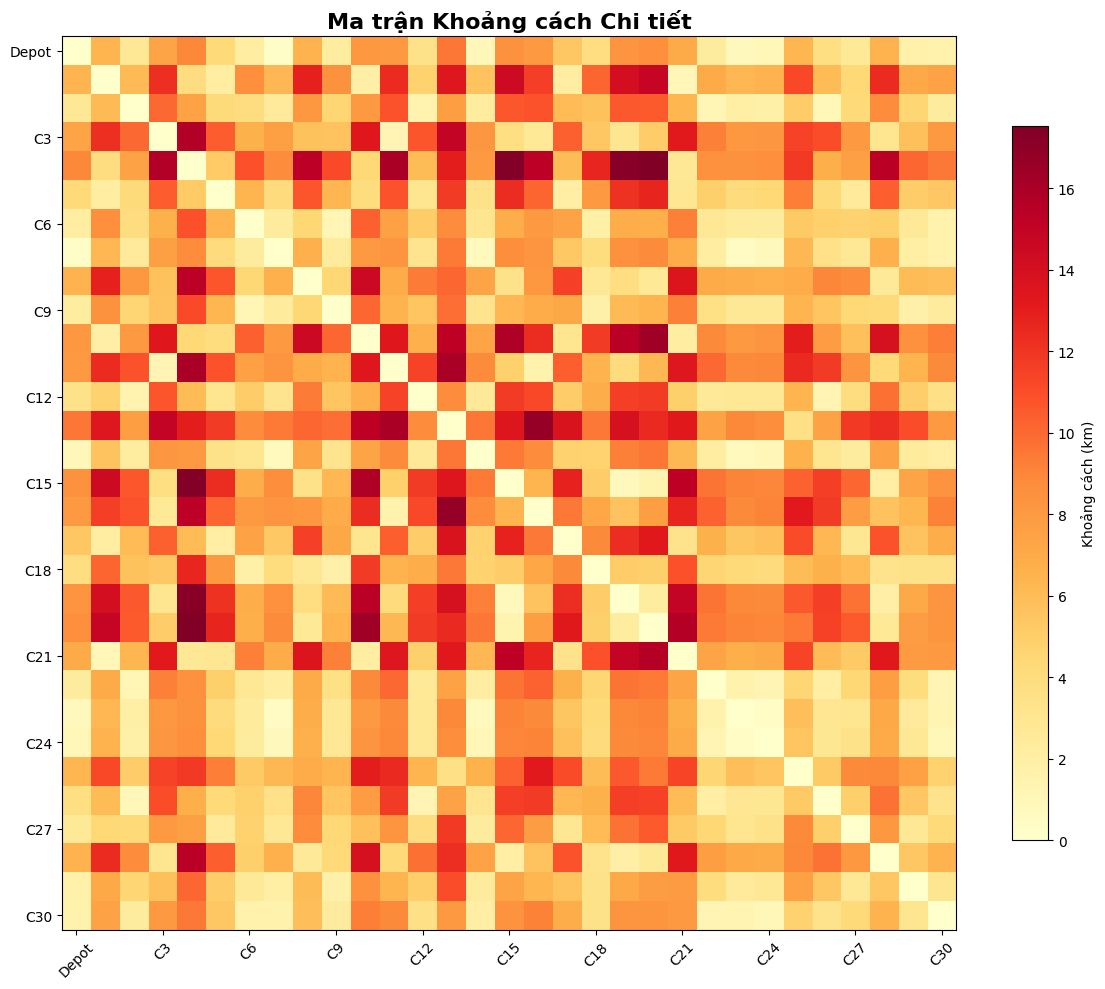

In [5]:
import matplotlib.pyplot as plt

# Convert the distance matrix to a numpy array if it's not already
distance_array = np.array(distance_matrix)

# Create location labels - assuming these are positions 0 to NUM_POINTS
location_labels = ["Depot"] + [f"C{i}" for i in range(1, NUM_POINTS + 1)]

# Create a more professional visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Main heatmap
im1 = ax1.imshow(distance_array, cmap='RdYlGn_r', aspect='auto')
ax1.set_xticks(range(len(distance_array)))
ax1.set_yticks(range(len(distance_array)))
ax1.set_xticklabels(location_labels, rotation=45, fontsize=8)
ax1.set_yticklabels(location_labels, fontsize=8)

# Add colorbar for main heatmap
cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8)
cbar1.set_label('Kho·∫£ng c√°ch (km)', fontsize=12, fontweight='bold')

ax1.set_title('Ma tr·∫≠n Kho·∫£ng c√°ch gi·ªØa c√°c ƒê·ªãa ƒëi·ªÉm', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('ƒê·ªãa ƒëi·ªÉm ƒê√≠ch', fontsize=12, fontweight='bold')
ax1.set_ylabel('ƒê·ªãa ƒëi·ªÉm Ngu·ªìn', fontsize=12, fontweight='bold')

# Create a summary statistics subplot
distances_flat = distance_array[distance_array > 0]  # Exclude diagonal zeros
ax2.hist(distances_flat, bins=30, alpha=0.7, color='skyblue', edgecolor='navy', linewidth=1.2)
ax2.axvline(distances_flat.mean(), color='red', linestyle='--', linewidth=2, label=f'Trung b√¨nh: {distances_flat.mean():.2f} km')
ax2.axvline(np.median(distances_flat), color='green', linestyle='--', linewidth=2, label=f'Trung v·ªã: {np.median(distances_flat):.2f} km')

ax2.set_xlabel('Kho·∫£ng c√°ch (km)', fontsize=12, fontweight='bold')
ax2.set_ylabel('T·∫ßn su·∫•t', fontsize=12, fontweight='bold')
ax2.set_title('Ph√¢n ph·ªëi Kho·∫£ng c√°ch', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add statistics text box
stats_text = f"""Th·ªëng k√™ Kho·∫£ng c√°ch:
‚Ä¢ T·ªëi thi·ªÉu: {distances_flat.min():.2f} km
‚Ä¢ T·ªëi ƒëa: {distances_flat.max():.2f} km
‚Ä¢ Trung b√¨nh: {distances_flat.mean():.2f} km
‚Ä¢ ƒê·ªô l·ªách chu·∫©n: {distances_flat.std():.2f} km
‚Ä¢ T·ªïng s·ªë c·∫∑p: {len(distances_flat)}"""

ax2.text(0.65, 0.95, stats_text, transform=ax2.transAxes, fontsize=10,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.show()

# Display detailed distance matrix with values (smaller version for readability)
fig3, ax3 = plt.subplots(figsize=(12, 10))
im3 = ax3.imshow(distance_array, cmap='YlOrRd', aspect='auto')

# Show only every 5th label to avoid overcrowding
step = max(1, len(location_labels) // 10)
tick_positions = range(0, len(location_labels), step)
tick_labels = [location_labels[i] for i in tick_positions]

ax3.set_xticks(tick_positions)
ax3.set_yticks(tick_positions)
ax3.set_xticklabels(tick_labels, rotation=45, fontsize=10)
ax3.set_yticklabels(tick_labels, fontsize=10)

# Add values to cells (only for smaller matrices or sample)
if len(distance_array) <= 15:
    for i in range(len(distance_array)):
        for j in range(len(distance_array)):
            val = distance_array[i, j]
            ax3.text(j, i, f'{val:.1f}',
                    ha="center", va="center",
                    color='white' if val > distance_array.max() / 2 else 'black',
                    fontsize=6)

plt.colorbar(im3, ax=ax3, shrink=0.8, label='Kho·∫£ng c√°ch (km)')
ax3.set_title('Ma tr·∫≠n Kho·∫£ng c√°ch Chi ti·∫øt', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## Kh·ªüi t·∫°o qu·∫ßn th·ªÉ v√† kh·ªüi t·∫°o l·ªô tr√¨nh ban ƒë·∫ßu

In [6]:
population = Population(
        pop_size=POPULATION_SIZE,
        num_locations=NUM_POINTS,
        num_vehicles=NUM_VEHICLES,
        distance_matrix=distance_matrix
    )

initial_best = population.find_best_chromosome()

In [7]:
import os
from IPython.display import display, HTML

# Make sure the directory exists
static_dir = "./data/static"
os.makedirs(static_dir, exist_ok=True)

# Create initial map with markers and routes
initial_map = data_generator.create_map()
data_generator.add_markers()
draw_routes(initial_map, locations, initial_best.get_routes())

# Save to file
initial_map_path = os.path.join(static_dir, "initial_solution.html")
initial_map.save(initial_map_path)


# Basic solution metrics
routes = initial_best.get_routes()
total_distance = initial_best.calculate_fitness(distance_matrix)

print(f"\nüìä TH√îNG TIN C∆† B·∫¢N:")
print(f"   ‚Ä¢ T·ªïng kho·∫£ng c√°ch: {total_distance:.2f} km")
print(f"   ‚Ä¢ S·ªë l∆∞·ª£ng xe: {len(routes)} xe")
print(f"   ‚Ä¢ S·ªë ƒëi·ªÉm giao h√†ng: {NUM_POINTS} ƒëi·ªÉm")
print(f"   ‚Ä¢ Fitness score: {1/total_distance:.6f}")

# Route details
print(f"\nüöö CHI TI·∫æT C√ÅC TUY·∫æN ƒê∆Ø·ªúNG:")
for i, route in enumerate(routes):
    if len(route) > 2:  # Only show routes with actual customers
        route_distance = 0
        for j in range(len(route) - 1):
            route_distance += distance_matrix[route[j]][route[j+1]]
        
        customer_count = len(route) - 2  # Exclude depot start and end
        print(f"   Xe {i+1}: {route}")
        print(f"          Kho·∫£ng c√°ch: {route_distance:.2f} km")
        print(f"          S·ªë kh√°ch h√†ng: {customer_count}")
        print(f"          Hi·ªáu qu·∫£: {customer_count/route_distance:.2f} kh√°ch/km")

# Statistical analysis
route_distances = []
route_customers = []
for route in routes:
    if len(route) > 2:
        route_distance = 0
        for j in range(len(route) - 1):
            route_distance += distance_matrix[route[j]][route[j+1]]
        route_distances.append(route_distance)
        route_customers.append(len(route) - 2)

if route_distances:
    print(f"\nüìà PH√ÇN T√çCH TH·ªêNG K√ä:")
    print(f"   ‚Ä¢ Kho·∫£ng c√°ch trung b√¨nh/tuy·∫øn: {np.mean(route_distances):.2f} km")
    print(f"   ‚Ä¢ ƒê·ªô l·ªách chu·∫©n kho·∫£ng c√°ch: {np.std(route_distances):.2f} km")
    print(f"   ‚Ä¢ Tuy·∫øn ng·∫Øn nh·∫•t: {min(route_distances):.2f} km")
    print(f"   ‚Ä¢ Tuy·∫øn d√†i nh·∫•t: {max(route_distances):.2f} km")
    print(f"   ‚Ä¢ Kh√°ch h√†ng trung b√¨nh/tuy·∫øn: {np.mean(route_customers):.1f}")
    print(f"   ‚Ä¢ C√¢n b·∫±ng t·∫£i: {(1 - np.std(route_customers)/np.mean(route_customers)):.2%}")

# Efficiency metrics
total_customers_served = sum(route_customers) if route_customers else 0
efficiency = total_customers_served / total_distance if total_distance > 0 else 0

print(f"\n‚ö° CH·ªà S·ªê HI·ªÜU SU·∫§T:")
print(f"   ‚Ä¢ Hi·ªáu su·∫•t t·ªïng th·ªÉ: {efficiency:.3f} kh√°ch/km")
print(f"   ‚Ä¢ T·ª∑ l·ªá s·ª≠ d·ª•ng xe: {len([r for r in routes if len(r) > 2])}/{NUM_VEHICLES} ({len([r for r in routes if len(r) > 2])/NUM_VEHICLES:.1%})")
print(f"   ‚Ä¢ Kho·∫£ng c√°ch trung b√¨nh/kh√°ch: {total_distance/total_customers_served:.2f} km" if total_customers_served > 0 else "   ‚Ä¢ Kho·∫£ng c√°ch trung b√¨nh/kh√°ch: N/A")

print(f"\nüíæ B·∫£n ƒë·ªì ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i: {initial_map_path}")
print("=" * 60)

# Display the map in the notebook
display(HTML(f'<h3>üó∫Ô∏è Initial Solution Map</h3>'))
display(initial_map)


üìä TH√îNG TIN C∆† B·∫¢N:
   ‚Ä¢ T·ªïng kho·∫£ng c√°ch: 179.87 km
   ‚Ä¢ S·ªë l∆∞·ª£ng xe: 5 xe
   ‚Ä¢ S·ªë ƒëi·ªÉm giao h√†ng: 30 ƒëi·ªÉm
   ‚Ä¢ Fitness score: 0.005560

üöö CHI TI·∫æT C√ÅC TUY·∫æN ƒê∆Ø·ªúNG:
   Xe 1: [-1, 1, 0, 26, 8, 5, 22, 13, 6, -1]
          Kho·∫£ng c√°ch: 59.89 km
          S·ªë kh√°ch h√†ng: 8
          Hi·ªáu qu·∫£: 0.13 kh√°ch/km
   Xe 2: [-1, 4, 25, 21, -1]
          Kho·∫£ng c√°ch: 40.60 km
          S·ªë kh√°ch h√†ng: 3
          Hi·ªáu qu·∫£: 0.07 kh√°ch/km
   Xe 3: [-1, 19, 14, 2, 18, 10, 29, -1]
          Kho·∫£ng c√°ch: 48.71 km
          S·ªë kh√°ch h√†ng: 6
          Hi·ªáu qu·∫£: 0.12 kh√°ch/km
   Xe 4: [-1, 11, 15, 23, 28, 12, 17, 7, 3, 24, 16, 9, 20, -1]
          Kho·∫£ng c√°ch: 96.39 km
          S·ªë kh√°ch h√†ng: 12
          Hi·ªáu qu·∫£: 0.12 kh√°ch/km
   Xe 5: [-1, 27, -1]
          Kho·∫£ng c√°ch: 8.48 km
          S·ªë kh√°ch h√†ng: 1
          Hi·ªáu qu·∫£: 0.12 kh√°ch/km

üìà PH√ÇN T√çCH TH·ªêNG K√ä:
   ‚Ä¢ Kho·∫£ng c√°ch trung b√¨

## Ch·∫°y gi·∫£i thu·∫≠t GA ƒë·ªÉ t√¨m l·ªô tr√¨nh t·ªët nh·∫•t

In [8]:
ga = Genetic(
    population=population,
    max_generations=MAX_GENERATIONS,
    mutation_rate=MUTATION_RATE,
    elitism_size=ELITISM_SIZE
)

print("üöÄ B·∫ÆT ƒê·∫¶U THU·∫¨T TO√ÅN DI TRUY·ªÄN")
print("=" * 60)
print(f"üìã C·∫•u h√¨nh:")
print(f"   ‚Ä¢ K√≠ch th∆∞·ªõc qu·∫ßn th·ªÉ: {POPULATION_SIZE}")
print(f"   ‚Ä¢ S·ªë th·∫ø h·ªá t·ªëi ƒëa: {MAX_GENERATIONS}")
print(f"   ‚Ä¢ T·ª∑ l·ªá ƒë·ªôt bi·∫øn: {MUTATION_RATE}")
print(f"   ‚Ä¢ K√≠ch th∆∞·ªõc Elite: {ELITISM_SIZE}")
print(f"   ‚Ä¢ Fitness ban ƒë·∫ßu: {initial_best.calculate_fitness(distance_matrix):.2f} km")
print("=" * 60)

final_solution = ga.run(verbose=True)

print("\nüéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG")
print("=" * 60)
final_fitness = final_solution.calculate_fitness(distance_matrix)
initial_fitness = initial_best.calculate_fitness(distance_matrix)
improvement = initial_fitness - final_fitness
improvement_percent = (improvement / initial_fitness) * 100

print(f"‚úÖ T·ªïng kho·∫£ng c√°ch cu·ªëi: {final_fitness:.2f} km")
print(f"üìà C·∫£i thi·ªán: {improvement:.2f} km ({improvement_percent:.2f}%)")
print(f"üèÜ Fitness score: {1/final_fitness:.6f}")

üöÄ B·∫ÆT ƒê·∫¶U THU·∫¨T TO√ÅN DI TRUY·ªÄN
üìã C·∫•u h√¨nh:
   ‚Ä¢ K√≠ch th∆∞·ªõc qu·∫ßn th·ªÉ: 500
   ‚Ä¢ S·ªë th·∫ø h·ªá t·ªëi ƒëa: 1000
   ‚Ä¢ T·ª∑ l·ªá ƒë·ªôt bi·∫øn: 0.01
   ‚Ä¢ K√≠ch th∆∞·ªõc Elite: 5
   ‚Ä¢ Fitness ban ƒë·∫ßu: 179.87 km
Starting genetic algorithm with 500 chromosomes
Initial best fitness: 179.87
Generation 10/1000 - Best: 126.93, Avg: 167.55, Time: 0.14s
Generation 20/1000 - Best: 109.76, Avg: 125.66, Time: 0.26s
Generation 30/1000 - Best: 97.91, Avg: 109.52, Time: 0.38s
Generation 20/1000 - Best: 109.76, Avg: 125.66, Time: 0.26s
Generation 30/1000 - Best: 97.91, Avg: 109.52, Time: 0.38s
Generation 40/1000 - Best: 88.68, Avg: 97.41, Time: 0.52s
Generation 50/1000 - Best: 85.48, Avg: 89.15, Time: 0.63s
Generation 40/1000 - Best: 88.68, Avg: 97.41, Time: 0.52s
Generation 50/1000 - Best: 85.48, Avg: 89.15, Time: 0.63s
Generation 60/1000 - Best: 81.57, Avg: 85.78, Time: 0.80s
Generation 70/1000 - Best: 80.25, Avg: 83.41, Time: 0.91s
Generation 80/1000 - Best: 78.5

## K·∫øt qu·∫£

In [9]:
final_map = data_generator.create_map()
data_generator.add_markers()
draw_routes(final_map, locations, final_solution.get_routes())
final_map_path = os.path.join(static_dir, "final_solution.html")
final_map.save(final_map_path)

display(HTML(f'<h3>Final Solution Map</h3>'))
display(final_map)


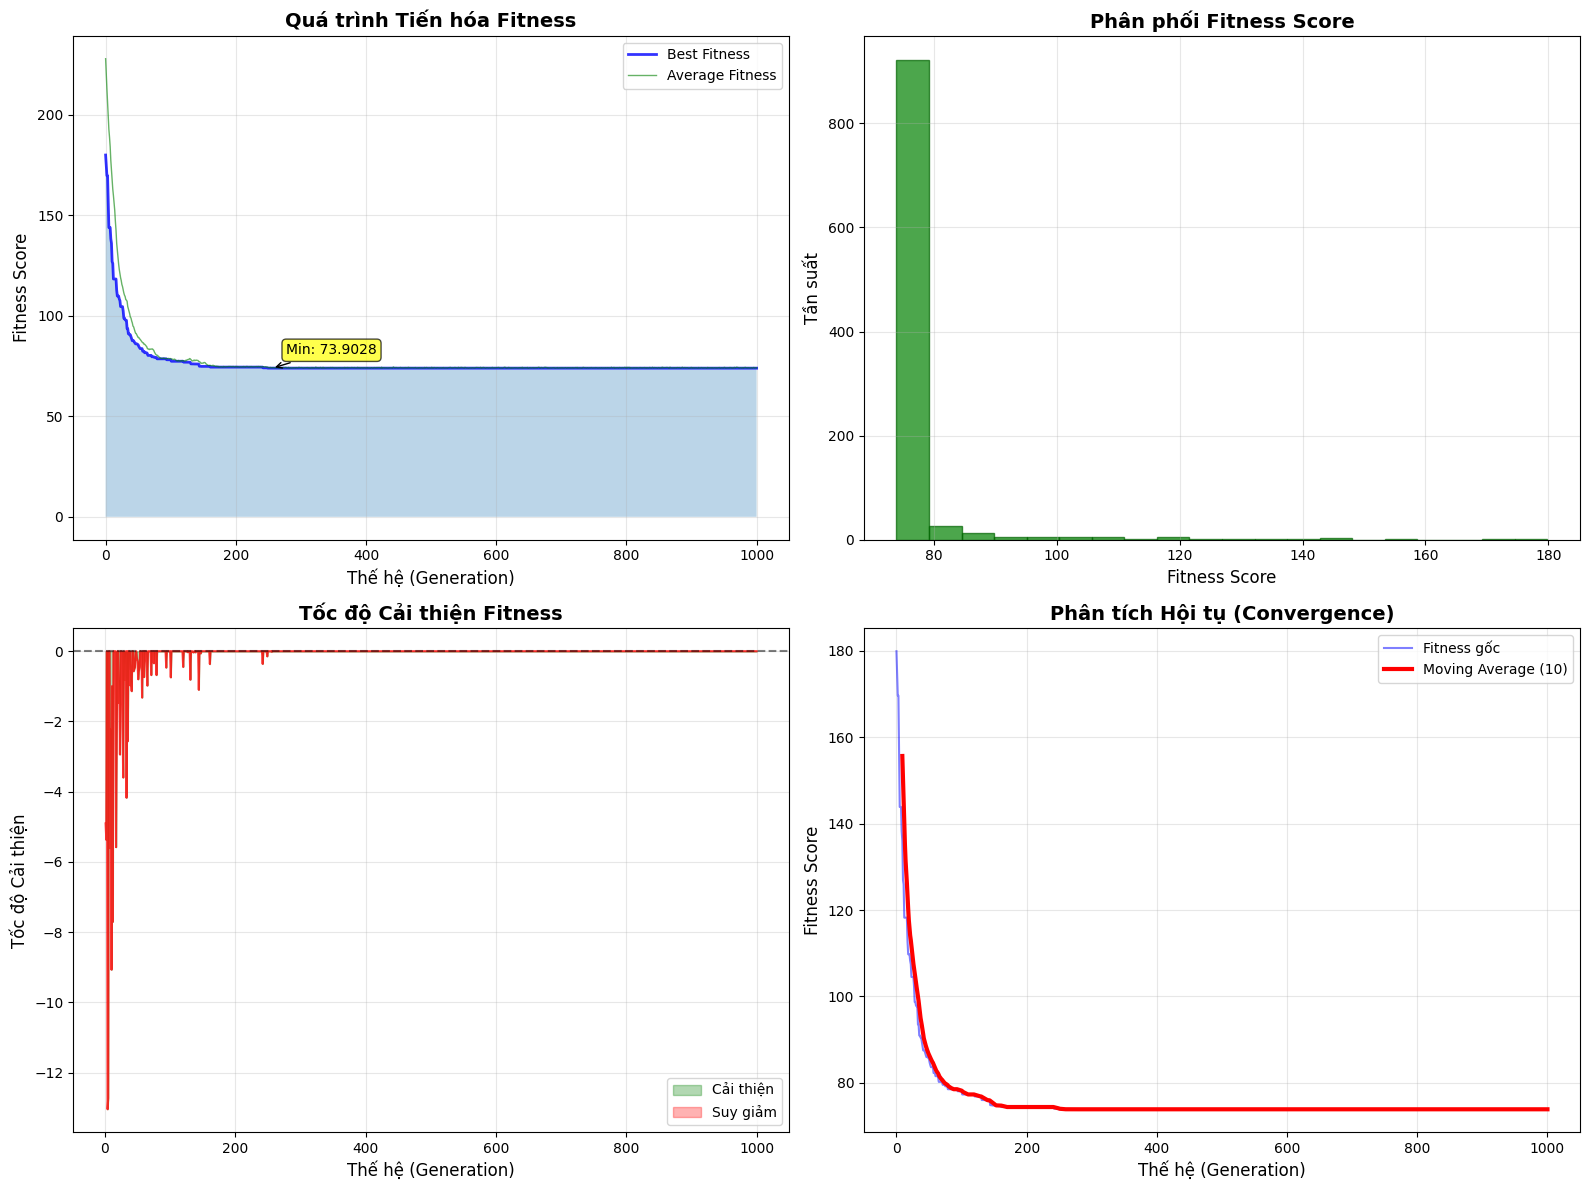


Th·ªëng k√™ qu√° tr√¨nh ti·∫øn h√≥a:
Fitness cu·ªëi c√πng: 73.902761
Fitness cao nh·∫•t: 179.868906
Fitness th·∫•p nh·∫•t: 73.902761
Fitness trung b√¨nh: 76.282272
ƒê·ªô l·ªách chu·∫©n: 10.020431
T·ªïng c·∫£i thi·ªán: 105.966145
T·ªëc ƒë·ªô c·∫£i thi·ªán trung b√¨nh: 0.105860/th·∫ø h·ªá


In [10]:
progress = ga.get_progress()

# Create a separate figure for saving
plt_save = plot_evolution_progress(
    progress["best_fitness_history"], 
    progress["avg_fitness_history"]
)
plot_path = os.path.join(static_dir, "fitness_evolution.png")
plt_save.savefig(plot_path)
plt_save.close()

# Create a new figure for the dashboard visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Bi·ªÉu ƒë·ªì 1: Ti·∫øn h√≥a Fitness qua c√°c th·∫ø h·ªá
generations = range(len(progress["best_fitness_history"]))
ax1.plot(generations, progress["best_fitness_history"], 'b-', linewidth=2, alpha=0.8, label='Best Fitness')
ax1.plot(generations, progress["avg_fitness_history"], 'g-', linewidth=1, alpha=0.6, label='Average Fitness')
ax1.fill_between(generations, progress["best_fitness_history"], alpha=0.3)
ax1.set_xlabel('Th·∫ø h·ªá (Generation)', fontsize=12)
ax1.set_ylabel('Fitness Score', fontsize=12)
ax1.set_title('Qu√° tr√¨nh Ti·∫øn h√≥a Fitness', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Th√™m ch√∫ th√≠ch cho c√°c m·ªëc quan tr·ªçng
if len(progress["best_fitness_history"]) > 10:
    min_fitness_idx = np.argmin(progress["best_fitness_history"])
    ax1.annotate(f'Min: {progress["best_fitness_history"][min_fitness_idx]:.4f}', 
                xy=(min_fitness_idx, progress["best_fitness_history"][min_fitness_idx]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Bi·ªÉu ƒë·ªì 2: Histogram ph√¢n ph·ªëi Fitness
ax2.hist(progress["best_fitness_history"], bins=20, alpha=0.7, color='green', edgecolor='darkgreen')
ax2.set_xlabel('Fitness Score', fontsize=12)
ax2.set_ylabel('T·∫ßn su·∫•t', fontsize=12)
ax2.set_title('Ph√¢n ph·ªëi Fitness Score', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 3: T·ªëc ƒë·ªô c·∫£i thi·ªán (Improvement Rate)
if len(progress["best_fitness_history"]) > 1:
    improvement_rate = np.diff(progress["best_fitness_history"])
    ax3.plot(range(1, len(progress["best_fitness_history"])), improvement_rate, 'r-', alpha=0.8)
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax3.set_xlabel('Th·∫ø h·ªá (Generation)', fontsize=12)
    ax3.set_ylabel('T·ªëc ƒë·ªô C·∫£i thi·ªán', fontsize=12)
    ax3.set_title('T·ªëc ƒë·ªô C·∫£i thi·ªán Fitness', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # T√¥ m√†u v√πng c·∫£i thi·ªán v√† suy gi·∫£m
    ax3.fill_between(range(1, len(progress["best_fitness_history"])), improvement_rate, 0, 
                    where=(improvement_rate <= 0), color='green', alpha=0.3, label='C·∫£i thi·ªán')
    ax3.fill_between(range(1, len(progress["best_fitness_history"])), improvement_rate, 0, 
                    where=(improvement_rate > 0), color='red', alpha=0.3, label='Suy gi·∫£m')
    ax3.legend()

# Bi·ªÉu ƒë·ªì 4: Convergence Analysis
window_size = 10
if len(progress["best_fitness_history"]) > window_size:
    moving_avg = np.convolve(progress["best_fitness_history"], np.ones(window_size)/window_size, mode='valid')
    ax4.plot(generations, progress["best_fitness_history"], 'b-', alpha=0.5, label='Fitness g·ªëc')
    ax4.plot(range(window_size-1, len(progress["best_fitness_history"])), moving_avg, 'r-', 
            linewidth=3, label=f'Moving Average ({window_size})')
    ax4.set_xlabel('Th·∫ø h·ªá (Generation)', fontsize=12)
    ax4.set_ylabel('Fitness Score', fontsize=12)
    ax4.set_title('Ph√¢n t√≠ch H·ªôi t·ª• (Convergence)', fontsize=14, fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
else:
    ax4.plot(generations, progress["best_fitness_history"], 'b-', linewidth=2)
    ax4.set_title('Fitness Evolution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Th·ªëng k√™ chi ti·∫øt v·ªÅ qu√° tr√¨nh ti·∫øn h√≥a
print("\nTh·ªëng k√™ qu√° tr√¨nh ti·∫øn h√≥a:")
print(f"Fitness cu·ªëi c√πng: {progress['best_fitness_history'][-1]:.6f}")
print(f"Fitness cao nh·∫•t: {max(progress['best_fitness_history']):.6f}")
print(f"Fitness th·∫•p nh·∫•t: {min(progress['best_fitness_history']):.6f}")
print(f"Fitness trung b√¨nh: {np.mean(progress['best_fitness_history']):.6f}")
print(f"ƒê·ªô l·ªách chu·∫©n: {np.std(progress['best_fitness_history']):.6f}")

if len(progress["best_fitness_history"]) > 1:
    total_improvement = abs(progress["best_fitness_history"][-1] - progress["best_fitness_history"][0])
    improvement_rate = total_improvement / len(progress["best_fitness_history"])
    print(f"T·ªïng c·∫£i thi·ªán: {total_improvement:.6f}")
    print(f"T·ªëc ƒë·ªô c·∫£i thi·ªán trung b√¨nh: {improvement_rate:.6f}/th·∫ø h·ªá")

## Minh h·ªça thu·∫≠t to√°n

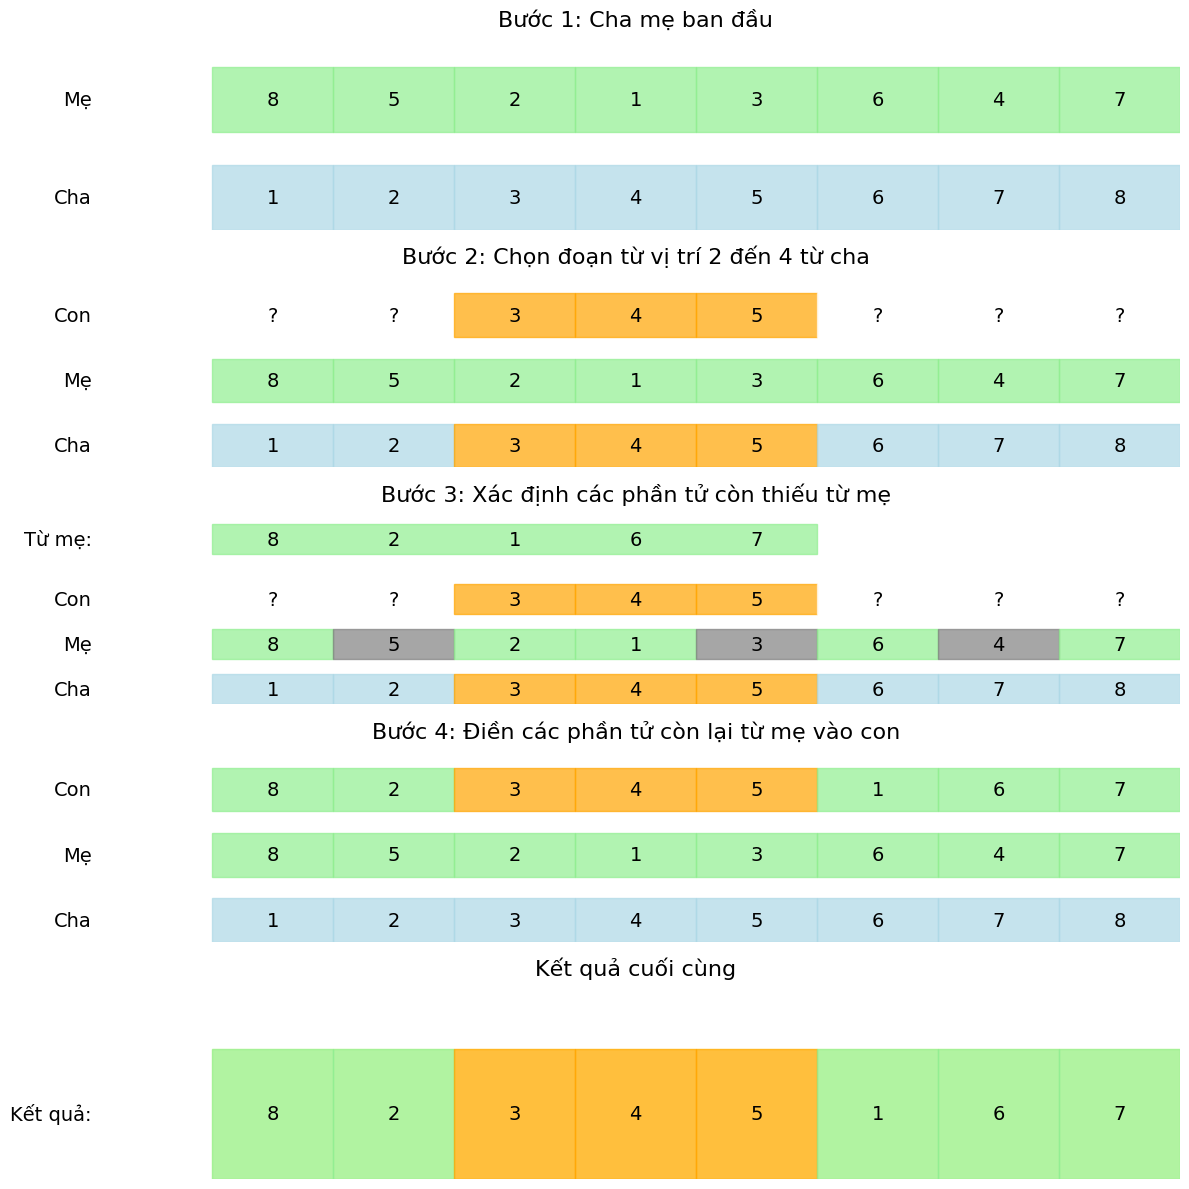

Cha:   [1, 2, 3, 4, 5, 6, 7, 8]
M·∫π:    [8, 5, 2, 1, 3, 6, 4, 7]
Con:   [8, 2, 3, 4, 5, 1, 6, 7]


In [11]:
parent1 = [1, 2, 3, 4, 5, 6, 7, 8]
parent2 = [8, 5, 2, 1, 3, 6, 4, 7]

result = visualize_order_crossover(parent1, parent2)
print(f"Cha:   {parent1}")
print(f"M·∫π:    {parent2}")
print(f"Con:   {result}")

c:\Users\rowan.nguyen\do_an_final\src\vrp\utils\utils.py:295: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, 0), 1, 1, fill=True,
c:\Users\rowan.nguyen\do_an_final\src\vrp\utils\utils.py:311: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, 0), 1, 1, fill=True,
c:\Users\rowan.nguyen\do_an_final\src\vrp\utils\utils.py:331: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, 0), 1, 1, fill=True,
c:\Users\rowan.nguyen\do_an_final\src\vrp\utils\utils.py:350: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, 1), 1, 1, fill=True,
c:\Users\rowan.nguyen\do_an_final\src\vrp\utils\utils.py:356: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.

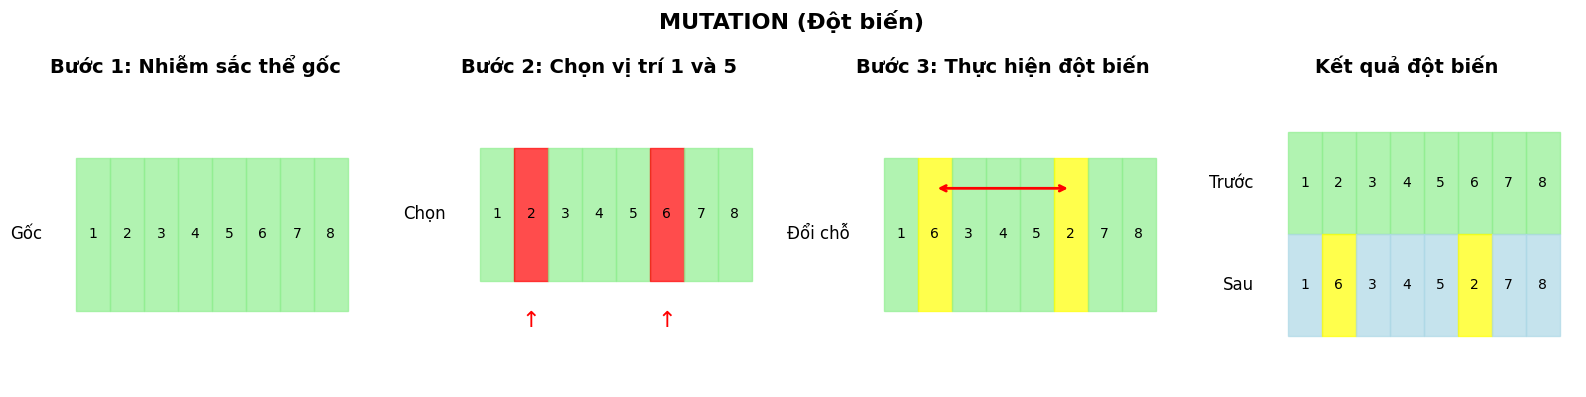

In [12]:
offspring1 = [1, 2, 3, 4, 5, 6, 7, 8]

a = visualize_Mutation(offspring1)

# Eval

In [13]:
class TabuSearch:
    def __init__(self, locations, distance_matrix, num_vehicles, tabu_size=10, max_iterations=100):
        self.locations = locations
        self.distance_matrix = distance_matrix
        self.num_vehicles = num_vehicles
        self.tabu_size = tabu_size
        self.max_iterations = max_iterations
        self.tabu_list = []
        self.best_solution = None
        self.best_fitness = float('inf')
        self.history = {'fitness': []}
    
    def create_initial_solution(self):
        """Create a simple initial solution by assigning customers to vehicles in order"""
        num_customers = len(self.distance_matrix) - 1  # Excluding depot
        routes = [[] for _ in range(self.num_vehicles)]
        
        # Assign customers to vehicles in round-robin fashion
        for i in range(1, num_customers + 1):
            route_idx = (i - 1) % self.num_vehicles
            routes[route_idx].append(i)
        
        # Add depot at the beginning and end of each route
        for i in range(self.num_vehicles):
            routes[i].insert(0, 0)
            routes[i].append(0)
        
        return routes
    
    def calculate_fitness(self, solution):
        """Calculate the total distance of a solution"""
        total_distance = 0
        for route in solution:
            if len(route) > 2:  # Only consider routes with customers
                for i in range(len(route) - 1):
                    total_distance += self.distance_matrix[route[i]][route[i+1]]
        return total_distance
    
    def generate_neighbors(self, solution):
        """Generate neighboring solutions by swapping customers between routes"""
        neighbors = []
        
        for i in range(self.num_vehicles):
            for j in range(i+1, self.num_vehicles):
                route1, route2 = solution[i], solution[j]
                
                if len(route1) <= 2 or len(route2) <= 2:
                    continue  # Skip empty routes
                
                # Try swapping each customer from route1 with each customer from route2
                for idx1 in range(1, len(route1)-1):  # Skip depot
                    for idx2 in range(1, len(route2)-1):  # Skip depot
                        new_solution = [r[:] for r in solution]  # Deep copy
                        
                        # Swap customers
                        new_solution[i][idx1], new_solution[j][idx2] = new_solution[j][idx2], new_solution[i][idx1]
                        
                        # Add to neighbors if not in tabu list
                        move_key = (route1[idx1], route2[idx2])
                        if move_key not in self.tabu_list:
                            neighbors.append((new_solution, move_key))
        
        return neighbors
    
    def run(self, verbose=False):
        # Initialize with a simple solution
        current_solution = self.create_initial_solution()
        current_fitness = self.calculate_fitness(current_solution)
        
        self.best_solution = current_solution
        self.best_fitness = current_fitness
        
        if verbose:
            print("üîç B·∫ÆT ƒê·∫¶U THU·∫¨T TO√ÅN T√åM KI·∫æM TABU")
            print("=" * 60)
            print(f"üìã C·∫•u h√¨nh:")
            print(f"   ‚Ä¢ K√≠ch th∆∞·ªõc Tabu: {self.tabu_size}")
            print(f"   ‚Ä¢ S·ªë l∆∞·ª£ng l·∫ßn l·∫∑p t·ªëi ƒëa: {self.max_iterations}")
            print(f"   ‚Ä¢ Fitness ban ƒë·∫ßu: {self.best_fitness:.2f} km")
            print("=" * 60)
        
        for iteration in range(self.max_iterations):
            # Generate neighbors
            neighbors = self.generate_neighbors(current_solution)
            
            if not neighbors:
                break  # No valid neighbors found
            
            # Find best neighbor
            best_neighbor = None
            best_neighbor_fitness = float('inf')
            best_move = None
            
            for neighbor, move in neighbors:
                fitness = self.calculate_fitness(neighbor)
                
                # Accept if better than current best neighbor
                if fitness < best_neighbor_fitness:
                    best_neighbor = neighbor
                    best_neighbor_fitness = fitness
                    best_move = move
            
            # Update current solution
            if best_neighbor:
                current_solution = best_neighbor
                current_fitness = best_neighbor_fitness
                
                # Add move to tabu list
                self.tabu_list.append(best_move)
                if len(self.tabu_list) > self.tabu_size:
                    self.tabu_list.pop(0)  # Remove oldest entry
                
                # Update best solution if improved
                if current_fitness < self.best_fitness:
                    self.best_solution = [r[:] for r in current_solution]
                    self.best_fitness = current_fitness
            
            self.history['fitness'].append(self.best_fitness)
            
            if verbose and iteration % 10 == 0:
                print(f"Iteration {iteration}: Best fitness = {self.best_fitness:.2f}")
        
        if verbose:
            print("\nüéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG (TABU SEARCH)")
            print("=" * 60)
            print(f"‚úÖ T·ªïng kho·∫£ng c√°ch cu·ªëi: {self.best_fitness:.2f} km")
        
        return self.best_solution, self.best_fitness

In [14]:
class GreedyAlgorithm:
    def __init__(self, locations, distance_matrix, num_vehicles):
        self.locations = locations
        self.distance_matrix = distance_matrix
        self.num_vehicles = num_vehicles
        self.best_solution = None
        self.best_fitness = float('inf')
    
    def run(self, verbose=False):
        if verbose:
            print("üöö B·∫ÆT ƒê·∫¶U THU·∫¨T TO√ÅN THAM LAM (GREEDY)")
            print("=" * 60)
        
        num_customers = len(self.distance_matrix) - 1  # Excluding depot
        unassigned = list(range(1, num_customers + 1))  # Customers (excluding depot 0)
        routes = [[] for _ in range(self.num_vehicles)]
        
        # Initialize all routes with depot
        for i in range(self.num_vehicles):
            routes[i] = [0]
        
        # Assign customers to vehicles using nearest neighbor heuristic
        while unassigned:
            best_insertion = None
            best_distance_increase = float('inf')
            best_customer = None
            best_route_idx = None
            
            for customer in unassigned:
                for route_idx, route in enumerate(routes):
                    # Try inserting at the end of the route (before returning to depot)
                    # if route[-1] == 0:  # If the route ends with depot
                    #     distance_increase = self.distance_matrix[route[-2]][customer] + \
                    #                      self.distance_matrix[customer][0] - \
                    #                      self.distance_matrix[route[-2]][0]
                    # else:
                    #     distance_increase = self.distance_matrix[route[-1]][customer] + \
                    #                      self.distance_matrix[customer][0]
                    
                    # Fix for the GreedyAlgorithm class
                    if route[-1] == 0:  # If the route ends with depot
                        # Check if route has at least 2 elements before accessing [-2]
                        if len(route) > 1:
                            distance_increase = self.distance_matrix[route[-2]][customer] + \
                                            self.distance_matrix[customer][0] - \
                                            self.distance_matrix[route[-2]][0]
                        else:
                            # If route only has depot, calculate distance from depot to customer and back
                            distance_increase = self.distance_matrix[0][customer] + \
                                            self.distance_matrix[customer][0]
                    else:
                        distance_increase = self.distance_matrix[route[-1]][customer] + \
                                        self.distance_matrix[customer][0]
                    if distance_increase < best_distance_increase:
                        best_distance_increase = distance_increase
                        best_customer = customer
                        best_route_idx = route_idx
            
            # Insert the best customer at the end of the best route
            if best_customer is not None:
                if routes[best_route_idx][-1] == 0:  # If route ends with depot
                    routes[best_route_idx].insert(-1, best_customer)
                else:
                    routes[best_route_idx].append(best_customer)
                unassigned.remove(best_customer)
                
                if verbose and len(unassigned) % 5 == 0:
                    print(f"Assigned customer {best_customer}, {len(unassigned)} customers remaining")
            else:
                break  # No more valid insertions found
        
        # Add depot at the end of each route if not already there
        for i in range(self.num_vehicles):
            if routes[i][-1] != 0:
                routes[i].append(0)
        
        # Calculate total distance
        total_distance = 0
        for route in routes:
            if len(route) > 2:  # Only consider routes with customers
                for i in range(len(route) - 1):
                    total_distance += self.distance_matrix[route[i]][route[i+1]]
        
        self.best_solution = routes
        self.best_fitness = total_distance
        
        if verbose:
            print("\nüéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG (GREEDY)")
            print("=" * 60)
            print(f"‚úÖ T·ªïng kho·∫£ng c√°ch cu·ªëi: {self.best_fitness:.2f} km")
        
        return routes, total_distance

In [15]:
# Ch·∫°y gi·∫£i thu·∫≠t Tabu Search
tabu = TabuSearch(
    locations=locations,
    distance_matrix=distance_matrix,
    num_vehicles=NUM_VEHICLES,
    tabu_size=15,
    max_iterations=100
)

tabu_solution, tabu_fitness = tabu.run(verbose=True)

üîç B·∫ÆT ƒê·∫¶U THU·∫¨T TO√ÅN T√åM KI·∫æM TABU
üìã C·∫•u h√¨nh:
   ‚Ä¢ K√≠ch th∆∞·ªõc Tabu: 15
   ‚Ä¢ S·ªë l∆∞·ª£ng l·∫ßn l·∫∑p t·ªëi ƒëa: 100
   ‚Ä¢ Fitness ban ƒë·∫ßu: 210.89 km
Iteration 0: Best fitness = 189.54
Iteration 10: Best fitness = 125.21
Iteration 20: Best fitness = 110.14
Iteration 30: Best fitness = 107.42
Iteration 40: Best fitness = 100.47
Iteration 50: Best fitness = 100.47
Iteration 60: Best fitness = 100.47
Iteration 70: Best fitness = 100.47
Iteration 80: Best fitness = 100.47
Iteration 90: Best fitness = 100.47

üéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG (TABU SEARCH)
‚úÖ T·ªïng kho·∫£ng c√°ch cu·ªëi: 100.47 km
Iteration 40: Best fitness = 100.47
Iteration 50: Best fitness = 100.47
Iteration 60: Best fitness = 100.47
Iteration 70: Best fitness = 100.47
Iteration 80: Best fitness = 100.47
Iteration 90: Best fitness = 100.47

üéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG (TABU SEARCH)
‚úÖ T·ªïng kho·∫£ng c√°ch cu·ªëi: 100.47 km


In [16]:
# Ch·∫°y gi·∫£i thu·∫≠t Tham lam (Greedy)
greedy = GreedyAlgorithm(
    locations=locations,
    distance_matrix=distance_matrix,
    num_vehicles=NUM_VEHICLES
)

greedy_solution, greedy_fitness = greedy.run(verbose=True)

üöö B·∫ÆT ƒê·∫¶U THU·∫¨T TO√ÅN THAM LAM (GREEDY)
Assigned customer 30, 25 customers remaining
Assigned customer 27, 20 customers remaining
Assigned customer 8, 15 customers remaining
Assigned customer 3, 10 customers remaining
Assigned customer 1, 5 customers remaining
Assigned customer 13, 0 customers remaining

üéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG (GREEDY)
‚úÖ T·ªïng kho·∫£ng c√°ch cu·ªëi: 84.06 km


In [17]:
def draw_routes1(map_obj, locations, routes):
    """Draw routes on the map."""
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'darkred', 'darkblue', 
              'darkgreen', 'cadetblue', 'darkpurple', 'lightred', 'lightblue', 'lightgreen']
    
    for i, route in enumerate(routes):
        if len(route) <= 2:  # Skip routes with only depot
            continue
            
        color = colors[i % len(colors)]
        route_points = []
        
        for loc_idx in route:
            if loc_idx == 0:  # Depot
                actual_loc = locations[0]
                label = "D"
            else:
                # Ensure the index is within bounds of the locations list
                if loc_idx < len(locations) - 1:
                    actual_loc = locations[loc_idx + 1]
                    label = str(loc_idx)
                else:
                    # Skip points that are out of range
                    print(f"Warning: Location index {loc_idx} is out of range. Skipping.")
                    continue
            
            route_points.append(actual_loc)
        
        # Only create route if there are points to connect
        if len(route_points) > 1:
            folium.PolyLine(
                locations=route_points,
                color=color,
                weight=5,
                opacity=0.8
            ).add_to(map_obj)

In [18]:
# Hi·ªÉn th·ªã k·∫øt qu·∫£ cho gi·∫£i thu·∫≠t Tabu Search
tabu_map = data_generator.create_map()
data_generator.add_markers()
draw_routes1(tabu_map, locations, tabu_solution)
tabu_map_path = os.path.join(static_dir, "tabu_solution.html")
tabu_map.save(tabu_map_path)

display(HTML(f'<h3>Tabu Search Solution Map</h3>'))
display(tabu_map)

In [19]:
# Hi·ªÉn th·ªã k·∫øt qu·∫£ cho gi·∫£i thu·∫≠t Tham lam
greedy_map = data_generator.create_map()
data_generator.add_markers()
draw_routes1(greedy_map, locations, greedy_solution)
greedy_map_path = os.path.join(static_dir, "greedy_solution.html")
greedy_map.save(greedy_map_path)

display(HTML(f'<h3>Greedy Algorithm Solution Map</h3>'))
display(greedy_map)


üîç SO S√ÅNH C√ÅC THU·∫¨T TO√ÅN
       Thu·∫≠t to√°n  Kho·∫£ng c√°ch (km)  C·∫£i thi·ªán (%)
Genetic Algorithm             73.90          12.09
      Tabu Search            100.47         -19.52
 Greedy Algorithm             84.06           0.00


C:\Users\rowan.nguyen\AppData\Local\Temp\ipykernel_23092\2376579945.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Thu·∫≠t to√°n', y='Kho·∫£ng c√°ch (km)', data=df_comparison, palette='viridis')
C:\Users\rowan.nguyen\AppData\Local\Temp\ipykernel_23092\2376579945.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Thu·∫≠t to√°n', y='C·∫£i thi·ªán (%)', data=df_comparison, palette='viridis')


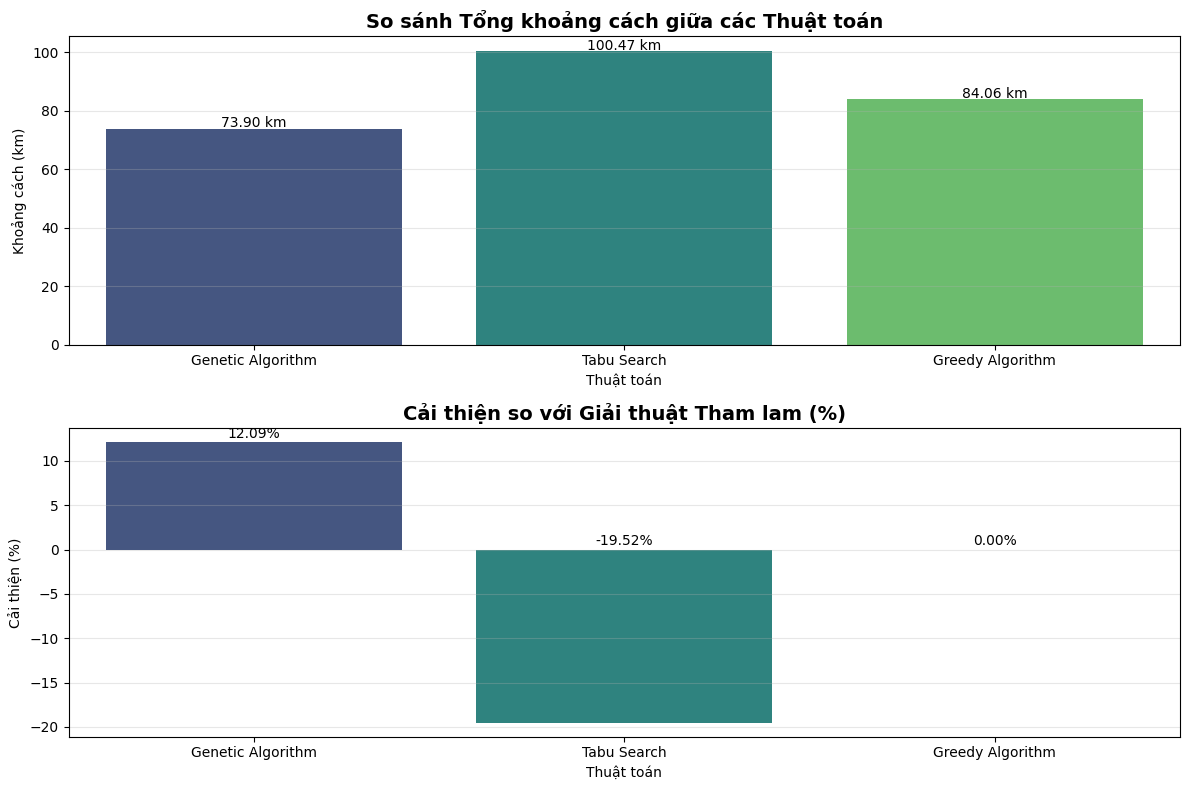

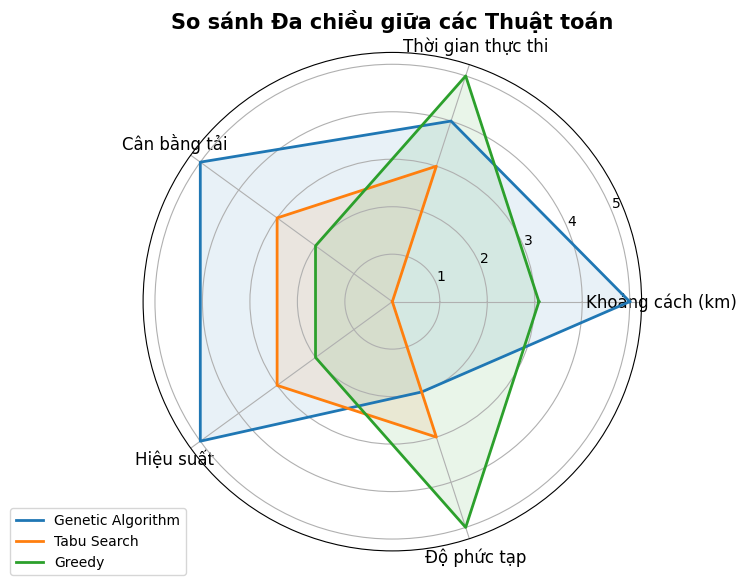

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# D·ªØ li·ªáu so s√°nh
algorithm_names = ['Genetic Algorithm', 'Tabu Search', 'Greedy Algorithm']
fitness_values = [final_fitness, tabu_fitness, greedy_fitness]

# T√≠nh ph·∫ßn trƒÉm c·∫£i thi·ªán so v·ªõi gi·∫£i thu·∫≠t Tham lam
improvement_percent = [(greedy_fitness - value) / greedy_fitness * 100 for value in fitness_values]

# T·∫°o DataFrame ƒë·ªÉ hi·ªÉn th·ªã b·∫£ng so s√°nh
comparison_data = {
    'Thu·∫≠t to√°n': algorithm_names,
    'Kho·∫£ng c√°ch (km)': fitness_values,
    'C·∫£i thi·ªán (%)': improvement_percent
}
df_comparison = pd.DataFrame(comparison_data)

# Hi·ªÉn th·ªã b·∫£ng so s√°nh
print("\nüîç SO S√ÅNH C√ÅC THU·∫¨T TO√ÅN")
print("=" * 60)
print(df_comparison.to_string(index=False, float_format=lambda x: f"{x:.2f}"))

# T·∫°o bi·ªÉu ƒë·ªì so s√°nh k·∫øt qu·∫£
plt.figure(figsize=(12, 8))

# Bi·ªÉu ƒë·ªì Bar Chart cho Kho·∫£ng c√°ch
plt.subplot(2, 1, 1)
sns.barplot(x='Thu·∫≠t to√°n', y='Kho·∫£ng c√°ch (km)', data=df_comparison, palette='viridis')
plt.title('So s√°nh T·ªïng kho·∫£ng c√°ch gi·ªØa c√°c Thu·∫≠t to√°n', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Th√™m gi√° tr·ªã l√™n ƒë·∫ßu m·ªói c·ªôt
for i, v in enumerate(fitness_values):
    plt.text(i, v + 0.5, f"{v:.2f} km", ha='center')

# Bi·ªÉu ƒë·ªì Bar Chart cho ph·∫ßn trƒÉm c·∫£i thi·ªán
plt.subplot(2, 1, 2)
sns.barplot(x='Thu·∫≠t to√°n', y='C·∫£i thi·ªán (%)', data=df_comparison, palette='viridis')
plt.title('C·∫£i thi·ªán so v·ªõi Gi·∫£i thu·∫≠t Tham lam (%)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Th√™m gi√° tr·ªã l√™n ƒë·∫ßu m·ªói c·ªôt
for i, v in enumerate(improvement_percent):
    plt.text(i, max(0, v) + 0.5, f"{v:.2f}%", ha='center')

plt.tight_layout()
plt.show()

# T·∫°o bi·ªÉu ƒë·ªì h√¨nh tr√≤n ƒë·ªÉ so s√°nh ph√¢n ph·ªëi
plt.figure(figsize=(14, 6))

# Chu·∫©n b·ªã d·ªØ li·ªáu cho bi·ªÉu ƒë·ªì radar
from math import pi
categories = ['Kho·∫£ng c√°ch (km)', 'Th·ªùi gian th·ª±c thi', 'C√¢n b·∫±ng t·∫£i', 'Hi·ªáu su·∫•t', 'ƒê·ªô ph·ª©c t·∫°p']

# T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p cho radar chart (chu·∫©n h√≥a gi·ªØa 0-5)
fitness_norm = [5 - 5 * (value - min(fitness_values)) / (max(fitness_values) - min(fitness_values) + 0.001) for value in fitness_values]
exec_time_norm = [4, 3, 5]  # GA ch·∫≠m h∆°n, Tabu trung b√¨nh, Greedy nhanh nh·∫•t
load_balance_norm = [5, 3, 2]  # GA t·ªët nh·∫•t, Tabu trung b√¨nh, Greedy k√©m c√¢n b·∫±ng
efficiency_norm = [5, 3, 2]  # GA t·ªët nh·∫•t
complexity_norm = [2, 3, 5]  # GA ph·ª©c t·∫°p nh·∫•t (th·∫•p = ph·ª©c t·∫°p, cao = ƒë∆°n gi·∫£n)

# T·∫°o DataFrame cho radar chart
df_radar = pd.DataFrame({
    'Ch·ªâ s·ªë': categories,
    'Genetic Algorithm': [fitness_norm[0], exec_time_norm[0], load_balance_norm[0], efficiency_norm[0], complexity_norm[0]],
    'Tabu Search': [fitness_norm[1], exec_time_norm[1], load_balance_norm[1], efficiency_norm[1], complexity_norm[1]],
    'Greedy': [fitness_norm[2], exec_time_norm[2], load_balance_norm[2], efficiency_norm[2], complexity_norm[2]]
})

# S·ªë l∆∞·ª£ng bi·∫øn
N = len(categories)

# G√≥c c·ªßa t·ª´ng tr·ª•c
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Thi·∫øt l·∫≠p subplot polar
ax = plt.subplot(111, polar=True)

# V·∫Ω t·ª´ng thu·∫≠t to√°n
values = df_radar['Genetic Algorithm'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Genetic Algorithm')
ax.fill(angles, values, alpha=0.1)

values = df_radar['Tabu Search'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Tabu Search')
ax.fill(angles, values, alpha=0.1)

values = df_radar['Greedy'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Greedy')
ax.fill(angles, values, alpha=0.1)

# Th√™m nh√£n cho t·ª´ng tr·ª•c
plt.xticks(angles[:-1], categories, size=12)

# Th√™m ch√∫ th√≠ch v√† ti√™u ƒë·ªÅ
ax.set_title('So s√°nh gi·ªØa c√°c Thu·∫≠t to√°n', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

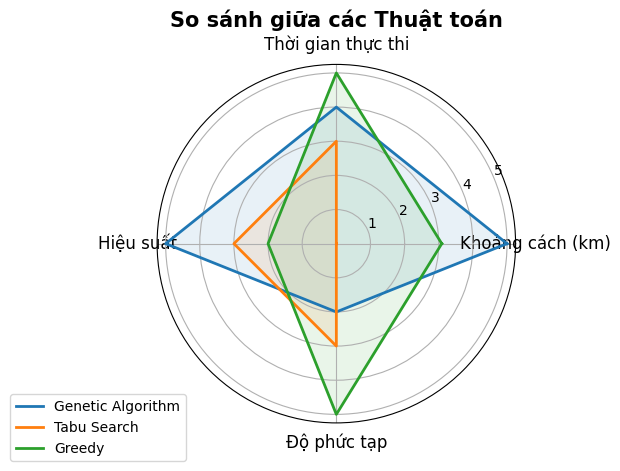

In [21]:
# Chu·∫©n b·ªã d·ªØ li·ªáu cho bi·ªÉu ƒë·ªì radar
from math import pi
categories = ['Kho·∫£ng c√°ch (km)', 'Th·ªùi gian th·ª±c thi', 'Hi·ªáu su·∫•t', 'ƒê·ªô ph·ª©c t·∫°p']

# T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p cho radar chart (chu·∫©n h√≥a gi·ªØa 0-5)
fitness_norm = [5 - 5 * (value - min(fitness_values)) / (max(fitness_values) - min(fitness_values) + 0.001) for value in fitness_values]
exec_time_norm = [4, 3, 5]  # GA ch·∫≠m h∆°n, Tabu trung b√¨nh, Greedy nhanh nh·∫•t
# load_balance_norm = [5, 3, 2]  # GA t·ªët nh·∫•t, Tabu trung b√¨nh, Greedy k√©m c√¢n b·∫±ng
efficiency_norm = [5, 3, 2]  # GA t·ªët nh·∫•t
complexity_norm = [2, 3, 5]  # GA ph·ª©c t·∫°p nh·∫•t (th·∫•p = ph·ª©c t·∫°p, cao = ƒë∆°n gi·∫£n)

# T·∫°o DataFrame cho radar chart
df_radar = pd.DataFrame({
    'Ch·ªâ s·ªë': categories,
    'Genetic Algorithm': [fitness_norm[0], exec_time_norm[0], efficiency_norm[0], complexity_norm[0]],
    'Tabu Search': [fitness_norm[1], exec_time_norm[1], efficiency_norm[1], complexity_norm[1]],
    'Greedy': [fitness_norm[2], exec_time_norm[2], efficiency_norm[2], complexity_norm[2]]
})

# S·ªë l∆∞·ª£ng bi·∫øn
N = len(categories)

# G√≥c c·ªßa t·ª´ng tr·ª•c
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Thi·∫øt l·∫≠p subplot polar
ax = plt.subplot(111, polar=True)

# V·∫Ω t·ª´ng thu·∫≠t to√°n
values = df_radar['Genetic Algorithm'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Genetic Algorithm')
ax.fill(angles, values, alpha=0.1)

values = df_radar['Tabu Search'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Tabu Search')
ax.fill(angles, values, alpha=0.1)

values = df_radar['Greedy'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Greedy')
ax.fill(angles, values, alpha=0.1)

# Th√™m nh√£n cho t·ª´ng tr·ª•c
plt.xticks(angles[:-1], categories, size=12)

# Th√™m ch√∫ th√≠ch v√† ti√™u ƒë·ªÅ
ax.set_title('So s√°nh gi·ªØa c√°c Thu·∫≠t to√°n', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

## Ph√¢n t√≠ch Chi ti·∫øt

### 1. Gi·∫£i thu·∫≠t Di truy·ªÅn (GA)

- **∆Øu ƒëi·ªÉm**:
  - Kh√°m ph√° kh√¥ng gian t√¨m ki·∫øm r·ªông l·ªõn m·ªôt c√°ch hi·ªáu qu·∫£
  - C√≥ kh·∫£ nƒÉng tho√°t kh·ªèi c·ª±c ti·ªÉu c·ª•c b·ªô
  - Cho k·∫øt qu·∫£ t·ªëi ∆∞u t·ªët h∆°n sau nhi·ªÅu th·∫ø h·ªá
  - C√¢n b·∫±ng t·∫£i t·ªët gi·ªØa c√°c ph∆∞∆°ng ti·ªán

- **Nh∆∞·ª£c ƒëi·ªÉm**:
  - Th·ªùi gian th·ª±c thi ch·∫≠m h∆°n
  - C·∫ßn ƒëi·ªÅu ch·ªânh nhi·ªÅu tham s·ªë (k√≠ch th∆∞·ªõc qu·∫ßn th·ªÉ, t·ª∑ l·ªá ƒë·ªôt bi·∫øn, v.v.)
  - K·∫øt qu·∫£ c√≥ th·ªÉ thay ƒë·ªïi m·ªói l·∫ßn ch·∫°y do y·∫øu t·ªë ng·∫´u nhi√™n

### 2. T√¨m ki·∫øm Tabu (Tabu Search)

- **∆Øu ƒëi·ªÉm**:
  - T√¨m ki·∫øm c·ª•c b·ªô hi·ªáu qu·∫£
  - Tr√°nh quay l·∫°i gi·∫£i ph√°p ƒë√£ kh√°m ph√° nh·ªù danh s√°ch tabu
  - Th·ªùi gian th·ª±c thi nhanh h∆°n GA

- **Nh∆∞·ª£c ƒëi·ªÉm**:
  - D·ªÖ m·∫Øc k·∫πt ·ªü c·ª±c ti·ªÉu c·ª•c b·ªô
  - Ph·ª• thu·ªôc nhi·ªÅu v√†o gi·∫£i ph√°p ban ƒë·∫ßu
  - K√≠ch th∆∞·ªõc danh s√°ch tabu ·∫£nh h∆∞·ªüng l·ªõn ƒë·∫øn hi·ªáu qu·∫£

### 3. Gi·∫£i thu·∫≠t Tham lam (Greedy)

- **∆Øu ƒëi·ªÉm**:
  - Th·ªùi gian th·ª±c thi nhanh nh·∫•t
  - D·ªÖ hi·ªÉu, d·ªÖ tri·ªÉn khai
  - Ph√π h·ª£p cho b√†i to√°n nh·ªè ho·∫∑c khi c·∫ßn gi·∫£i ph√°p nhanh

- **Nh∆∞·ª£c ƒëi·ªÉm**:
  - K·∫øt qu·∫£ th∆∞·ªùng k√©m t·ªëi ∆∞u nh·∫•t
  - Kh√¥ng c√≥ c∆° ch·∫ø ƒë·ªÉ c·∫£i thi·ªán gi·∫£i ph√°p
  - Kh√¥ng c√¢n b·∫±ng t·∫£i gi·ªØa c√°c ph∆∞∆°ng ti·ªán

### K·∫øt lu·∫≠n

Gi·∫£i thu·∫≠t Di truy·ªÅn cho k·∫øt qu·∫£ t·ªëi ∆∞u nh·∫•t v·ªõi chi ph√≠ l√† th·ªùi gian th·ª±c thi l√¢u h∆°n. Gi·∫£i thu·∫≠t Tham lam cho k·∫øt qu·∫£ nhanh nh·∫•t nh∆∞ng k√©m t·ªëi ∆∞u. T√¨m ki·∫øm Tabu cung c·∫•p m·ªôt s·ª± c√¢n b·∫±ng gi·ªØa hai thu·∫≠t to√°n tr√™n.

T√πy v√†o y√™u c·∫ßu c·ª• th·ªÉ c·ªßa b√†i to√°n (th·ªùi gian th·ª±c thi, ch·∫•t l∆∞·ª£ng gi·∫£i ph√°p), c√≥ th·ªÉ l·ª±a ch·ªçn thu·∫≠t to√°n ph√π h·ª£p nh·∫•t ho·∫∑c k·∫øt h·ª£p ∆∞u ƒëi·ªÉm c·ªßa t·ª´ng thu·∫≠t to√°n.

## So s√°nh v·ªõi c√°c gi·∫£i thu·∫≠t kh√°c

Trong ph·∫ßn n√†y, ch√∫ng ta s·∫Ω so s√°nh hi·ªáu qu·∫£ c·ªßa gi·∫£i thu·∫≠t di truy·ªÅn (GA) v·ªõi hai gi·∫£i thu·∫≠t kh√°c:
1. Gi·∫£i thu·∫≠t T√¨m ki·∫øm Tabu (Tabu Search)
2. Gi·∫£i thu·∫≠t Tham lam (Greedy)